# Linear Regression

Steps in Machine Learning are as follows:-

1. Understanding the Problem
2. Decide the Analytic Approach
3. Data Requirements and Data Collection
4. Data Understanding
5. Data Preparation
6. Modelling your Data
7. Evaluating the collected data

# Types of Correlation

1. Positive Coorelation
2. Negative Coorelation

Steps to build a Model

1. Get Sammple Data
2. Explore and prepare the data
3. Design a model that explains the data
4. Evaluate the Model Performance
5. Improve Model Performance
6. Make Prediction for whole Populaation

# Correlation Vs Causation



# Types of Linear Regression

1. Simple Linear Regression - It is used to estimate the relation between two quantitative variable
        out of which one is independent while the other is dependent variable
 
2. Multiple Linear Regression - It is used to estimate the relation between multiple variables from which
        one is dependent while others are independent
        
3. Polynomial Regression - After Getting the points if they are joined by a polynomial curve then the regression
        is called polynomial regression
        

Construct a Linear Model that predicts cars milege with its other attributes

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/IamVigneshC/Machine-Learning-Data-Science/master/Python/CardioGoodFitness-1.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


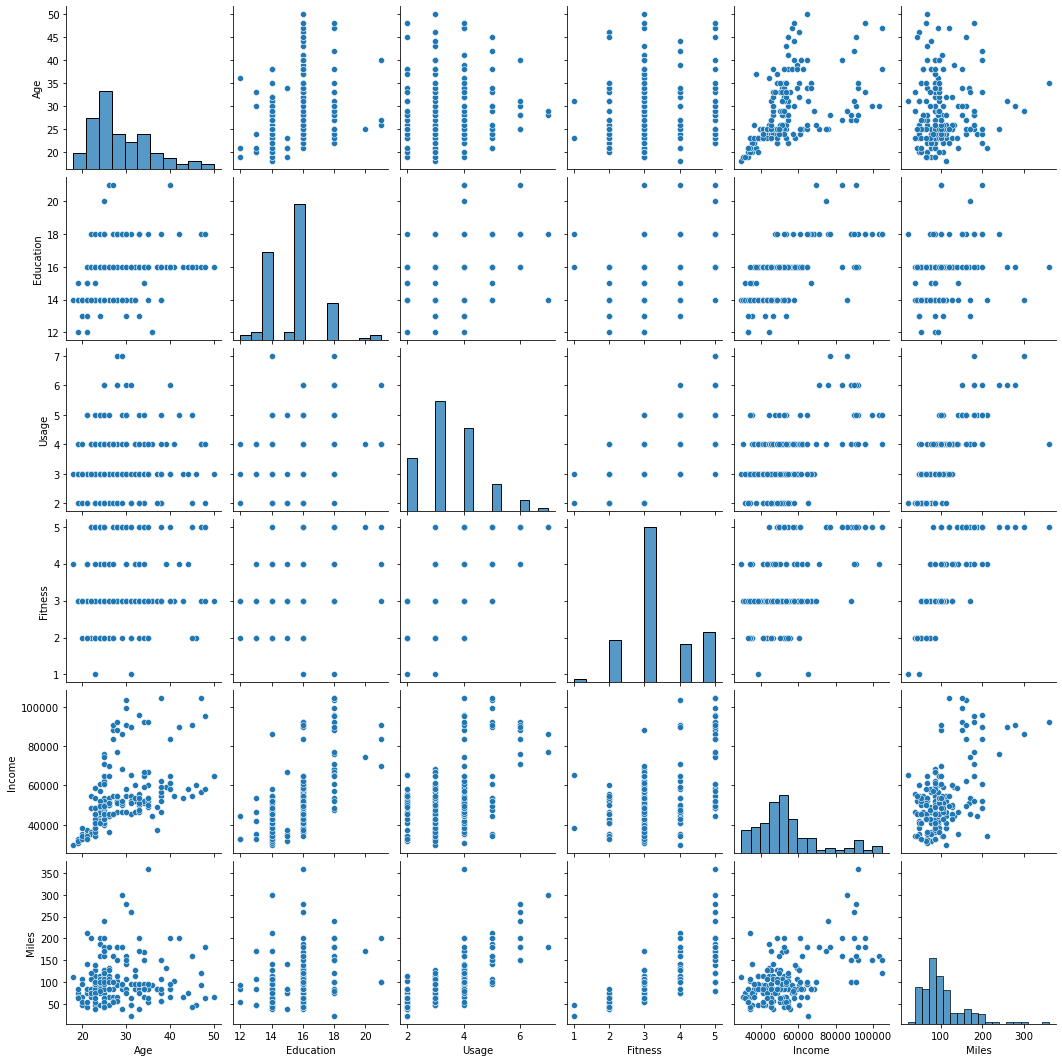

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
car_df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/auto-mpg.csv")

In [7]:
car_df.shape

(398, 9)

In [8]:
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
53,31.0,4,71.0,65,1773,19.0,71,3,toyota corolla 1200
218,36.0,4,79.0,58,1825,18.6,77,2,renault 5 gtl
318,29.8,4,134.0,90,2711,15.5,80,3,toyota corona liftback
167,29.0,4,97.0,75,2171,16.0,75,3,toyota corolla
219,25.5,4,122.0,96,2300,15.5,77,1,plymouth arrow gs
38,14.0,8,350.0,165,4209,12.0,71,1,chevrolet impala
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
208,13.0,8,318.0,150,3940,13.2,76,1,plymouth volare premier v8
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl
332,29.8,4,89.0,62,1845,15.3,80,2,vokswagen rabbit


In [9]:
car_df.drop("car name", axis = 1, inplace = True)

In [10]:
car_df.drop("model year", axis = 1, inplace= True)

In [11]:
car_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1


In [12]:
car_df.shape

(398, 7)

In [13]:
car_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin'],
      dtype='object')

In [14]:
car_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
origin            int64
dtype: object

In [15]:
car_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1
5,15.0,8,429.0,198,4341,10.0,1
6,14.0,8,454.0,220,4354,9.0,1
7,14.0,8,440.0,215,4312,8.5,1
8,14.0,8,455.0,225,4425,10.0,1
9,15.0,8,390.0,190,3850,8.5,1


In [16]:
car_df['origin'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: origin, dtype: int64

In [17]:
car_df['origin'] = car_df["origin"].replace({1 : "India", 2: "America", 3: "Europe"})

In [18]:
car_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
338,27.2,4,135.0,84,2490,15.7,India
52,30.0,4,88.0,76,2065,14.5,America
85,13.0,8,350.0,175,4100,13.0,India
177,23.0,4,115.0,95,2694,15.0,America
102,26.0,4,97.0,46,1950,21.0,America


In [19]:
car_df.describe(include = "all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,3
top,NaN,NaN,NaN,150,NaN,NaN,India
freq,NaN,NaN,NaN,22,NaN,NaN,249
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,NaN


In [20]:
car_df = pd.get_dummies(car_df, columns =['origin'])
car_df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_America,origin_Europe,origin_India
169,20.0,6,232.0,100,2914,16.0,0,0,1
29,27.0,4,97.0,88,2130,14.5,0,1,0
177,23.0,4,115.0,95,2694,15.0,1,0,0
253,20.5,6,200.0,95,3155,18.2,0,0,1
90,12.0,8,429.0,198,4952,11.5,0,0,1
150,26.0,4,108.0,93,2391,15.5,0,1,0
284,20.6,6,225.0,110,3360,16.6,0,0,1
178,23.0,4,120.0,88,2957,17.0,1,0,0
320,37.0,4,119.0,92,2434,15.0,0,1,0
286,17.6,8,302.0,129,3725,13.4,0,0,1


In [21]:
hpIsDigit = pd.DataFrame(car_df.horsepower.str.isdigit())

car_df[hpIsDigit["horsepower"] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_America,origin_Europe,origin_India
32,25.0,4,98.0,?,2046,19.0,0,0,1
126,21.0,6,200.0,?,2875,17.0,0,0,1
330,40.9,4,85.0,?,1835,17.3,1,0,0
336,23.6,4,140.0,?,2905,14.3,0,0,1
354,34.5,4,100.0,?,2320,15.8,1,0,0
374,23.0,4,151.0,?,3035,20.5,0,0,1


In [22]:
car_df = car_df.replace("?", np.nan)

In [23]:
car_df[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_America,origin_Europe,origin_India
32,25.0,4,98.0,NaN,2046,19.0,0,0,1
126,21.0,6,200.0,NaN,2875,17.0,0,0,1
330,40.9,4,85.0,NaN,1835,17.3,1,0,0
336,23.6,4,140.0,NaN,2905,14.3,0,0,1
354,34.5,4,100.0,NaN,2320,15.8,1,0,0
374,23.0,4,151.0,NaN,3035,20.5,0,0,1


In [24]:
car_df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
origin_America       0.0
origin_Europe        0.0
origin_India         1.0
dtype: float64

In [25]:
medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller, axis = 0)

In [77]:
car_df['horsepower'] = car_df['horsepower'].astype('float64')
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_America,origin_Europe,origin_India
0,18.0,8,307.0,130.0,3504,12.0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,0,1


In [27]:
car_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_America,origin_Europe,origin_India
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,0.175879,0.198492,0.625628
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,0.381197,0.399367,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1.000000,1.000000,1.000000


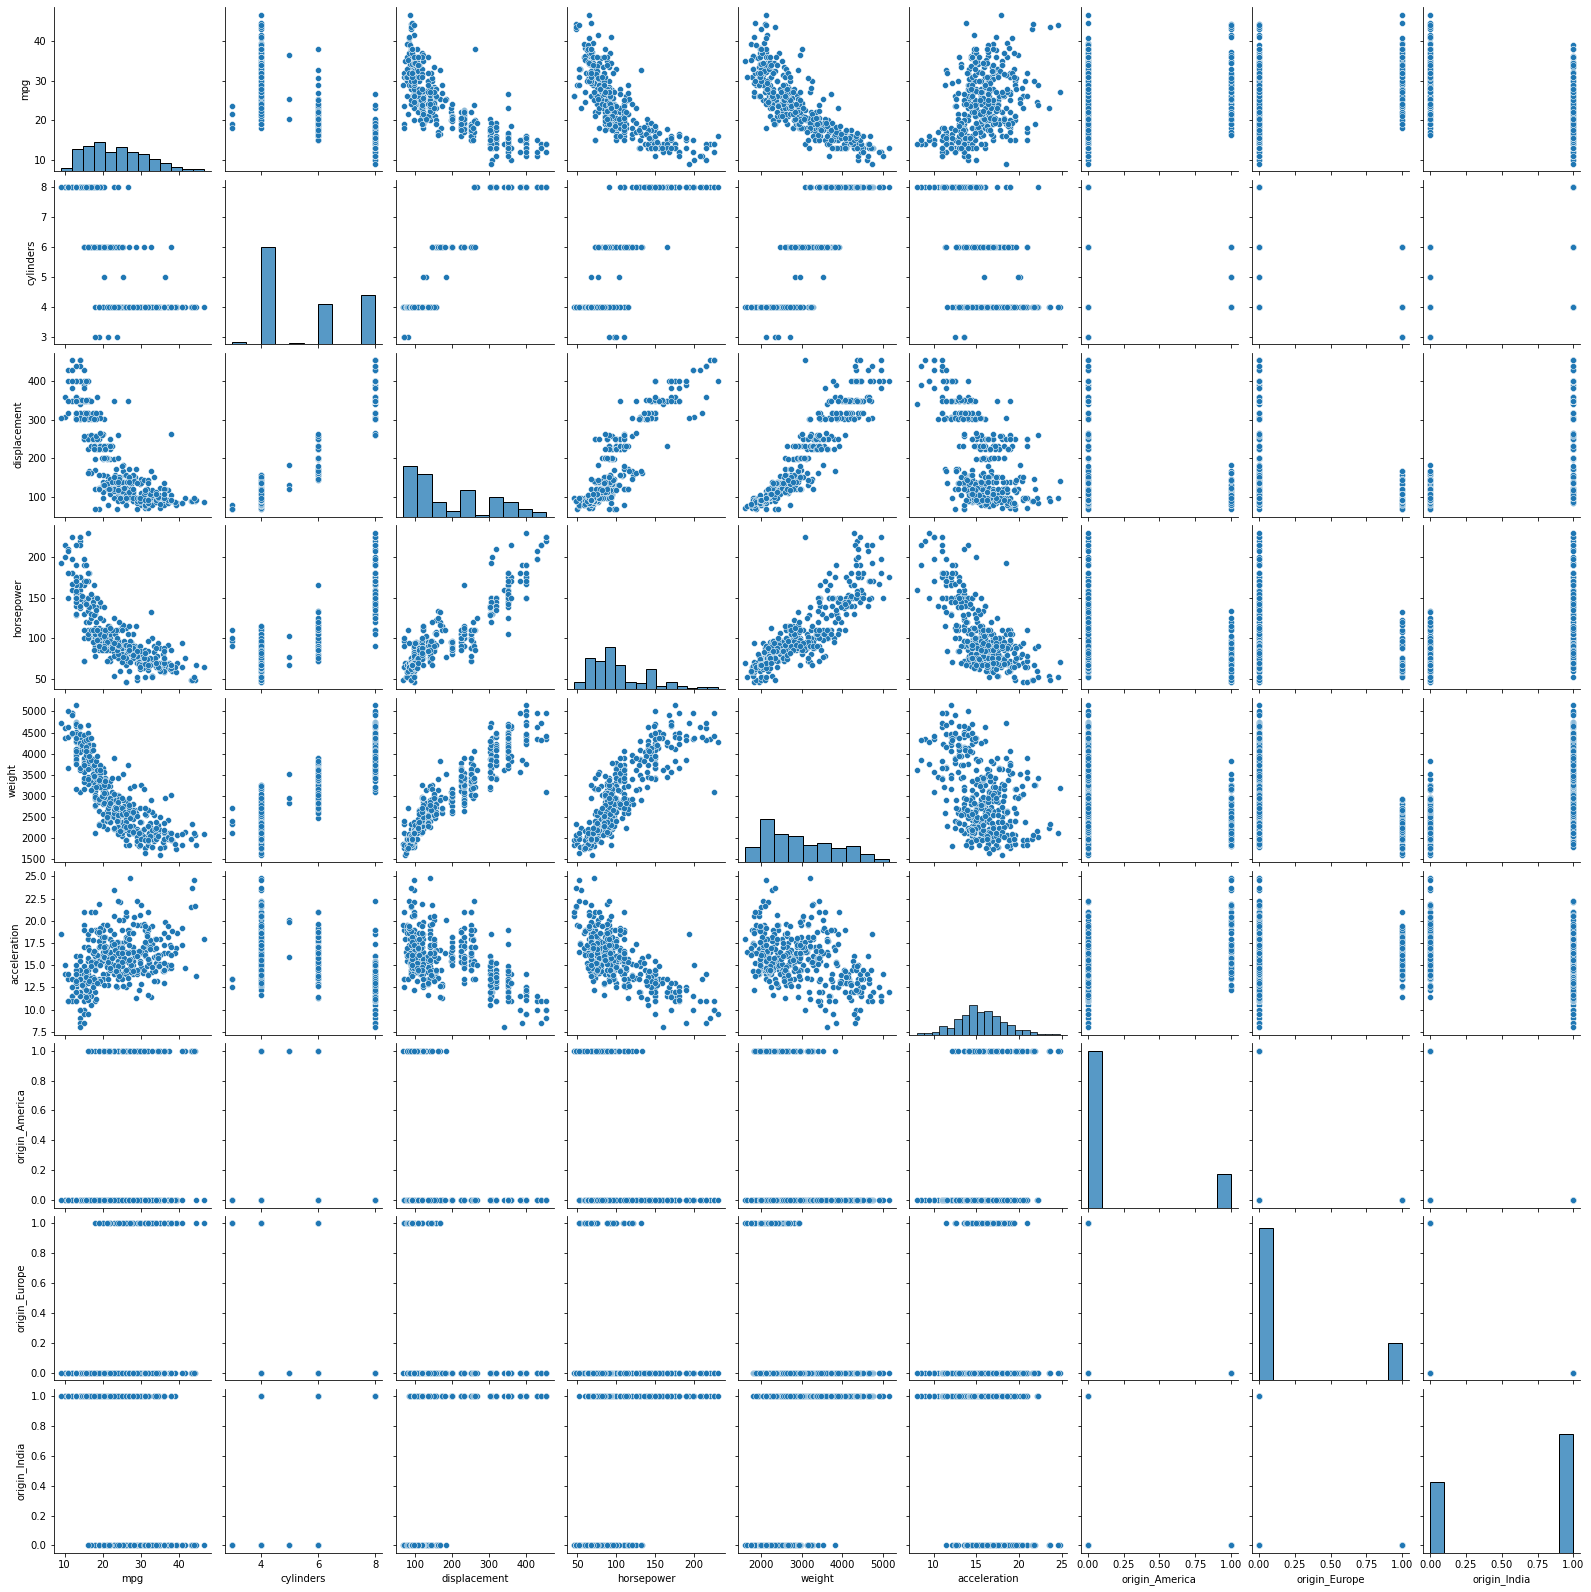

In [28]:
sns.pairplot(car_df)

# Split Data


In [29]:
x = car_df.drop(["mpg"], axis = 1)
y = car_df['mpg']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [86]:
print(X_train)

     cylinders  displacement  horsepower  weight  acceleration  \
350          4         105.0        63.0    2215          14.9   
59           4          97.0        54.0    2254          23.5   
120          4         121.0       112.0    2868          15.5   
12           8         400.0       150.0    3761           9.5   
349          4          91.0        68.0    1985          16.0   
..         ...           ...         ...     ...           ...   
393          4         140.0        86.0    2790          15.6   
255          4         140.0        88.0    2720          15.4   
72           8         304.0       150.0    3892          12.5   
235          4          97.0        75.0    2265          18.2   
37           6         232.0       100.0    3288          15.5   

     origin_America  origin_Europe  origin_India  
350               0              0             1  
59                1              0             0  
120               1              0             0  
12 

# Fit Linear Model

In [87]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [88]:
reg_model.score(X_train, y_train)

0.6946279278265036

In [89]:
reg_model.score(X_test, y_test)

0.7725116212499805

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree = 2, interaction_only = True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)
print(poly_clf.score(X_train2, y_train))

0.7639885994389923


In [91]:
print(poly_clf.score(X_test2, y_test))

0.7558663469131697
